In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_KEY']= # Use your own kaggle key
os.environ['KAGGLE_USERNAME']="kipkuruimutai"

In [ ]:
!kaggle datasets list -s business

ref                                                       title                                       size  lastUpdated          downloadCount  
--------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  
theworldbank/doing-business                               Doing Business                               2MB  2019-05-16 20:08:31            355  
xvivancos/barcelona-data-sets                             Barcelona data sets                          1MB  2020-02-15 23:29:29          11405  
gerosa/procon                                             Consumer Business Complaints in Brazil      76MB  2017-10-11 21:22:17           1324  
census/business-and-industry-reports                      Business and Industry Reports                7MB  2017-10-17 23:21:56           2569  
census/total-business-inventories-and-sales-data          Total Business Inventories and Sales Data   20KB  2019-12-06 09:13:53   

In [ ]:
! kaggle datasets download mczielinski/bitcoin-historical-data
from zipfile import ZipFile 
file_name = "/content/bitcoin-historical-data.zip"
with ZipFile(file_name, 'r') as zip:                      # 'r' -> READ mode 
    zip.printdir() # print all the contents 
    zip.extractall()

del zip

!head -5 /content/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv

bitcoin-historical-data.zip: Skipping, found more recently modified local copy (use --force to force download)
File Name                                             Modified             Size
bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv 2021-01-04 01:55:36    306821981
Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1325317920,4.39,4.39,4.39,4.39,0.45558087,2.0000000193,4.39
1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import shutil
shutil.move("/content/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv", "/content/drive/MyDrive/Bitcoin")

'/content/drive/MyDrive/Bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv'

In [2]:
!head -10 /content/drive/MyDrive/Bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv

Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1325317920,4.39,4.39,4.39,4.39,0.45558087,2.0000000193,4.39
1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 9.1MB/s 
     |████████████████████████████████| 2.1MB 29.2MB/s 
     |████████████████████████████████| 9.5MB 36.0MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders
from datetime import datetime

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")



# Data Exploration

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [7]:
df.shape

(4727777, 8)

In [8]:
# checking for non-unique timestamp
df['Timestamp'].nunique()

4727777

In [9]:
# setting the timestamp to be the index
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]
df = df.set_index('Timestamp')

In [10]:
df.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4727777 entries, 2011-12-31 07:52:00 to 2020-12-31 00:00:00
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Open               float64
 1   High               float64
 2   Low                float64
 3   Close              float64
 4   Volume_(BTC)       float64
 5   Volume_(Currency)  float64
 6   Weighted_Price     float64
dtypes: float64(7)
memory usage: 288.6 MB


# Data Processing.


In [13]:
#Remove unneeded columns
bitcoin_columns= [ 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)']
df.drop(bitcoin_columns,axis=1, inplace=True)

In [14]:
df.head()

,Weighted_Price
Timestamp,
2011-12-31 07:52:00,4.39
2011-12-31 07:53:00,NaN
2011-12-31 07:54:00,NaN
2011-12-31 07:55:00,NaN
2011-12-31 07:56:00,NaN


In [15]:
df.isnull().sum()

Weighted_Price    1243472
dtype: int64

# Handling of missing data.
Imputation of missing values. 

In [16]:
missing_col = ['Weighted_Price']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [17]:
df.isnull().sum()

Weighted_Price    0
dtype: int64

In [18]:
df.head()

,Weighted_Price
Timestamp,
2011-12-31 07:52:00,4.39000
2011-12-31 07:53:00,4570.62516
2011-12-31 07:54:00,4570.62516
2011-12-31 07:55:00,4570.62516
2011-12-31 07:56:00,4570.62516


In [19]:
#resample your data to 'MS' and use mean function
y = df['Weighted_Price'].resample('MS').mean()

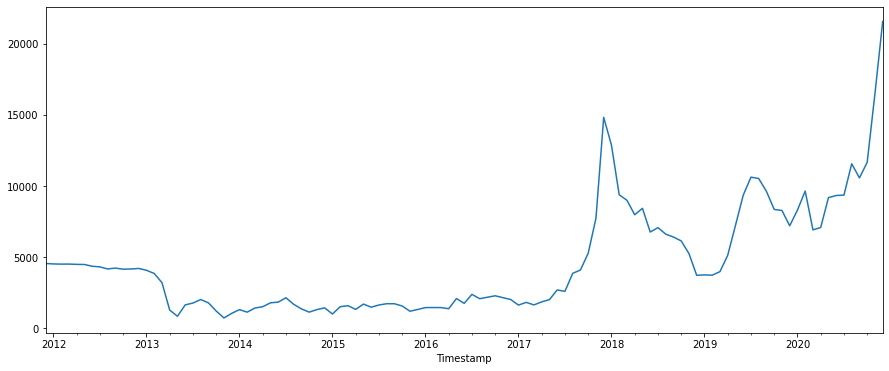

In [20]:
#use the line plot to see the entire database
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()

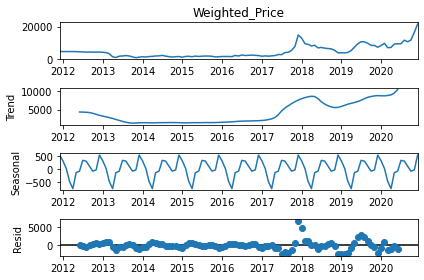

In [21]:
#import seasonal-decompose from the statsmodel and decompose the time series components in diffrent graphs

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive')  # model='mul' also works
result.plot();

In [22]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima                              # for determining ARIMA orders

In [23]:
import numpy as np
import pmdarima as pm

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
#As can be see there are seasonaly in our dataset, select the appropariate model 
#and train the model after finding the (p,d,q)(P,D,Q,M)

stepwise_fit = auto_arima(y,seasonal = True, m=12)

In [26]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  109
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -920.192
Date:                Tue, 12 Jan 2021   AIC                           1844.384
Time:                        12:57:53   BIC                           1849.748
Sample:                             0   HQIC                          1846.559
                                - 109                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3841      0.043      8.855      0.000       0.299       0.469
sigma2      1.516e+06    9.4e+04     16.128      0.000    1.33e+06     1.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               316.71
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              15.16   Skew:                             1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
len(y)

109

In [28]:
train=y.iloc[:85]
test=y.iloc[85:]

In [29]:
#6. Obtain predicted values
model = SARIMAX(train,order=(2,1,2),seasonal_order=(2,1,2,12))
results = model.fit()
#results.summary()
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Weighted_Price   No. Observations:                   85
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -616.665
Date:                            Tue, 12 Jan 2021   AIC                           1251.331
Time:                                    13:24:04   BIC                           1271.821
Sample:                                12-01-2011   HQIC                          1259.488
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8656      1.023     -0.846      0.397      -2.870       1.139
ar.L2         -0.3641      0.721     -0.505      0.613      -1.777       1.048
ma.L1          1.1366      1.064      1.068      0.286      -0.949       3.223
ma.L2          0.5703      0.713      0.800      0.424      -0.827       1.967
ar.S.L12      -0.3931      7.007     -0.056      0.955     -14.128      13.341
ar.S.L24       0.2381      4.278      0.056      0.956      -8.146       8.622
ma.S.L12      -0.6011      7.123     -0.084      0.933     -14.561      13.359
ma.S.L24      -0.0392      3.275     -0.012      0.990      -6.459       6.380
sigma2      2.534e+06   1.03e+06      2.457      0.014    5.13e+05    4.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               422.48
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               6.77   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
predictions

2019-01-01     2991.372618
2019-02-01     3257.974083
2019-03-01     3184.183060
2019-04-01     3090.758991
2019-05-01     3373.501484
2019-06-01     3718.887009
2019-07-01     3775.621391
2019-08-01     4487.485450
2019-09-01     4599.876237
2019-10-01     5254.402229
2019-11-01     6655.320833
2019-12-01    10985.512227
2020-01-01     9763.058029
2020-02-01     7721.210077
2020-03-01     7467.368321
2020-04-01     6802.403591
2020-05-01     7183.951722
2020-06-01     6253.826204
2020-07-01     6510.626429
2020-08-01     6359.013896
2020-09-01     6253.545610
2020-10-01     6208.162330
2020-11-01     5942.586564
2020-12-01     5979.881348
Freq: MS, Name: SARIMA(0,1,0)(2,0,0,12) Predictions, dtype: float64

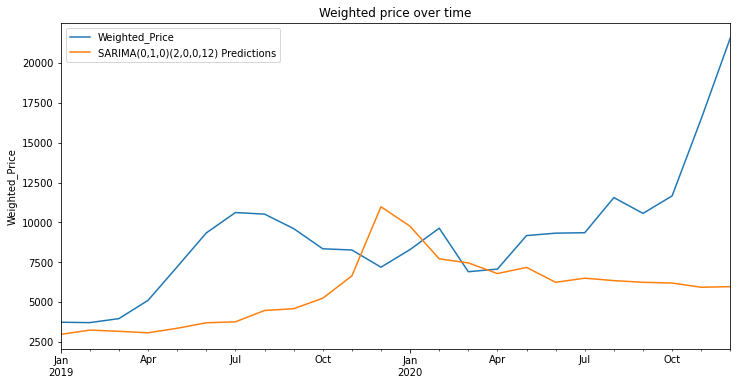

In [30]:
# Plot predictions against known values
title = 'Weighted price over time'
ylabel='Weighted_Price'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [31]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test, predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error:  5182.72918


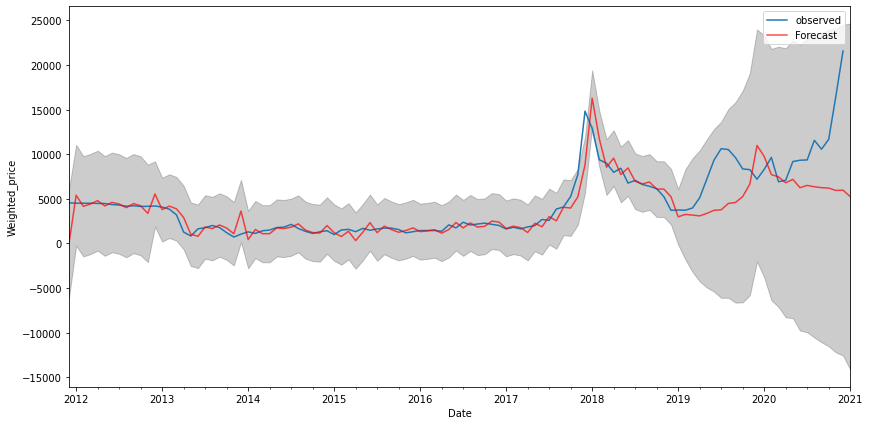

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2011-12-01'), end=pd.to_datetime('2020-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(color = 'r', ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weighted_price')
plt.legend()
plt.show()